In [38]:
import json
import logging
import faster_coco_eval
from faster_coco_eval import COCO
from faster_coco_eval.extra import Curves
from faster_coco_eval.extra import PreviewResults

In [39]:
def load(file):
    with open(file) as io:
        _data = json.load(io)
        
    return _data


In [40]:
prepared_coco_in_dict = load('/home/pwl/Projects/tiny-tracking/COCO/annotations/instances_val2017.json')
prepared_anns         = load('instances_yolox.json')

math_matches error: 
Traceback (most recent call last):
  File "/home/pwl/.conda/envs/tf/lib/python3.10/site-packages/faster_coco_eval/core/faster_eval_api.py", line 144, in accumulate
    self.math_matches()
  File "/home/pwl/.conda/envs/tf/lib/python3.10/site-packages/faster_coco_eval/core/faster_eval_api.py", line 167, in math_matches
    _gt_ann = self.cocoGt.anns[gt_id]
KeyError: -1843129861


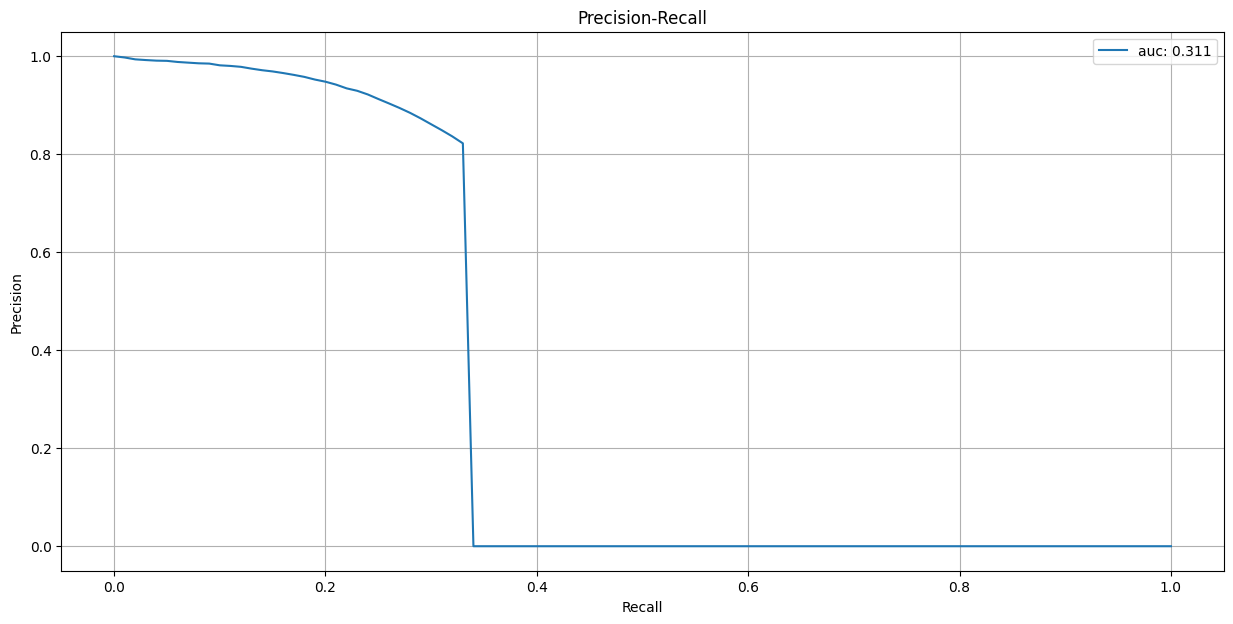

In [42]:
threshold_iou = 0.5

cocoGt = COCO(prepared_coco_in_dict)
cocoDt = cocoGt.loadRes(prepared_anns)

cur = Curves(cocoGt, cocoDt, iou_tresh=threshold_iou, iouType="bbox")
cur.plot_pre_rec(plotly_backend=False)